In [2]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import pandas as pd

In [3]:
ori = pd.read_csv("./texas_org.csv")
syn = pd.read_csv("./texas_syn_3.csv")

In [4]:
one = ['DISCHARGE', 'TYPE_OF_ADMISSION', 'PAT_STATUS', 'ADMIT_WEEKDAY', 'RISK_MORTALITY', 'ILLNESS_SEVERITY', 'LENGTH_OF_STAY']
two = ['PAT_STATE', 'SEX_CODE', 'RACE', 'ETHNICITY', 'PAT_AGE']

In [5]:
c_one = []
c_two = []
for c in ori.columns:
    for o in one:
        if o in c:
            c_one.append(c)
    for t in two:
        if t in c:
            c_two.append(c)

In [109]:
pub1 = ori[c_one]
pub2 = ori[c_two]

In [110]:
k_list = [2, 3, 4, 5]

In [120]:
nhs_risks = {}
for k in k_list:
    syn = pd.read_csv(f"./texas_{k}.csv")
    nn_model1 = NearestNeighbors(n_neighbors=1, algorithm='auto')
    nn_model2 = NearestNeighbors(n_neighbors=1, algorithm='auto')
    nn_model1.fit(syn[c_one])
    nn_model2.fit(syn[c_two])
    distances1, indices1 = nn_model1.kneighbors(pub1)
    distances2, indices2 = nn_model2.kneighbors(pub2)

    success = 0
    for i in range(len(indices1)):
        if indices1[i] == indices2[i]:
            success += 1
    rate = success / len(indices1)
    nhs_risks[f"K = {k}"] = rate

In [121]:
syn_risks = {}
degrees = [1, 2, 3]
for d in degrees:
    syn = pd.read_csv(f"./texas_syn_{d}.csv")
    nn_model1 = NearestNeighbors(n_neighbors=1, algorithm='auto')
    nn_model2 = NearestNeighbors(n_neighbors=1, algorithm='auto')
    nn_model1.fit(syn[c_one])
    nn_model2.fit(syn[c_two])
    distances1, indices1 = nn_model1.kneighbors(pub1)
    distances2, indices2 = nn_model2.kneighbors(pub2)

    success = 0
    for i in range(len(indices1)):
        if indices1[i] == indices2[i]:
            success += 1
    rate = success / len(indices1)
    syn_risks[f"D = {d}"] = rate

In [113]:
nhs_risks

{'K = 2': 0.003202964727681821,
 'K = 3': 0.0035603202964727683,
 'K = 4': 0.004923565614453048,
 'K = 5': 0.0040103236053206275}

In [114]:
syn_risks

{'D = 1': 0.0004632387002845609,
 'D = 2': 0.00018529548011382436,
 'D = 3': 0.0003705909602276487}

Text(0, 0.5, 'Linkability Risk')

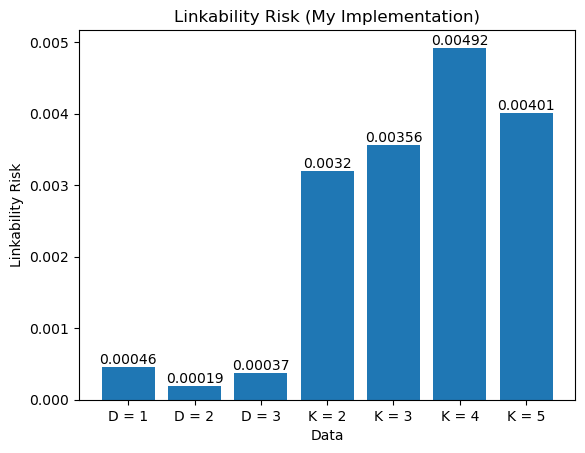

In [118]:
import matplotlib.pyplot as plt

names = [f"D = {d}" for d in degrees] + [f"K = {k}" for k in k_list]
height = [round(syn_risks[f"D = {d}"], 5) for d in degrees] + [round(nhs_risks[f"K = {k}"], 5) for k in k_list]
bar = plt.bar(names, height)
plt.bar_label(bar)
plt.title("Linkability Risk (My Implementation)")
plt.xlabel("Data")
plt.ylabel("Linkability Risk")

In [14]:
k_list = [2, 3, 4, 5]

In [15]:
columns = one + two + ["TOTAL_CHARGES"]
nhs_inference = {"K = 2" : 0, "K = 3" : 0, "K = 4" : 0, "K = 5" : 0}
for k in k_list:
    for secret in columns:
        observed_columns = []
        for c in ori.columns:
            if secret not in c:
                observed_columns.append(c)
        true_data = ori[observed_columns]
        syn = pd.read_csv(f"./texas_{k}.csv")
        nn_model1 = NearestNeighbors(n_neighbors=1, algorithm='auto')
        nn_model1.fit(syn[observed_columns])
        distances1, indices1 = nn_model1.kneighbors(true_data)

        success = 0
        for i in range(len(indices1)):
            if indices1[i] == i:
                success += 1
        rate = success / len(indices1)
        nhs_inference[f"K = {k}"] += rate
    nhs_inference[f"K = {k}"] /= len(columns)
    

In [16]:
columns = one + two + ["TOTAL_CHARGES"]
degrees = [1, 2, 3]
syn_inference = {"D = 1" : 0, "D = 2" : 0, "D = 3" : 0}
for d in degrees:
    for secret in columns:
        observed_columns = []
        for c in ori.columns:
            if secret not in c:
                observed_columns.append(c)
        true_data = ori[observed_columns]
        syn = pd.read_csv(f"./texas_syn_{d}.csv")
        nn_model1 = NearestNeighbors(n_neighbors=1, algorithm='auto')
        nn_model1.fit(syn[observed_columns])
        distances1, indices1 = nn_model1.kneighbors(true_data)

        success = 0
        for i in range(len(indices1)):
            if indices1[i] == i:
                success += 1
        rate = success / len(indices1)
        syn_inference[f"D = {d}"] += rate
    syn_inference[f"D = {d}"] /= len(columns)
    

In [19]:
nhs_inference

{'K = 2': 1.323539143670174e-05,
 'K = 3': 1.323539143670174e-05,
 'K = 4': 1.2217284403109297e-05,
 'K = 5': 2.8506996940588362e-05}

In [18]:
syn_inference

{'D = 1': 2.647078287340348e-05, 'D = 2': 0.0, 'D = 3': 1.2217284403109297e-05}

Text(0, 0.5, 'Linkability Risk')

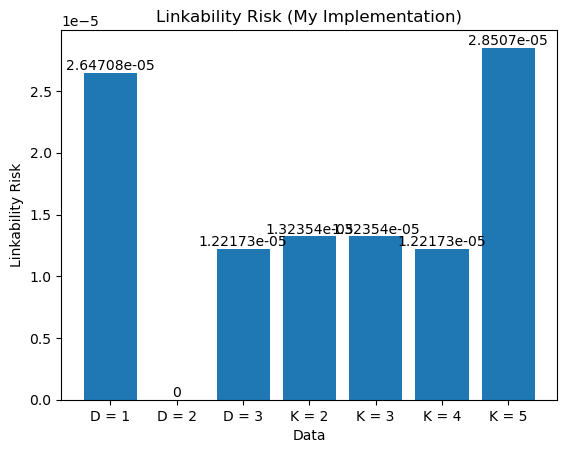

In [21]:
import matplotlib.pyplot as plt

names = [f"D = {d}" for d in degrees] + [f"K = {k}" for k in k_list]
height = [round(syn_inference[f"D = {d}"], 10) for d in degrees] + [round(nhs_inference[f"K = {k}"], 10) for k in k_list]
bar = plt.bar(names, height)
plt.bar_label(bar)
plt.title("Linkability Risk (My Implementation)")
plt.xlabel("Data")
plt.ylabel("Linkability Risk")